# PLIP tutorial

In this tutorial, we will learn to fit physical lasso lars machine (PLIP) learning model for SiO2 data set. Firstly we will show CLI for PLIP. Then 

## Check python version

In [1]:
!python --version

Python 3.8.10


## Command line interface

In [2]:
!plip_fit --help

usage: PLIP [-h] [--yaml {input.yaml}] [--compile] [--genbin {input.txt}]
            [--train {1}] [--genpot] [--version]

Physical Lassolars interaction potentials

optional arguments:
  -h, --help            show this help message and exit
  --yaml {input.yaml}, -i {input.yaml}
                        PLIP workflow
  --compile, -c         Compile C++ modules
  --genbin {input.txt}, -g {input.txt}
                        Generate binary files
  --train {1}, -t {1}   Run the lassolars
  --genpot, -p          Generate potential for all coefficient files
  --version, -v         version of the package


In [3]:
!plip_fit --version


Namespace(compile=False, genbin=None, genpot=False, train=None, version=True, yaml=None)
0.1.0


## Compile C++ modules


In [ ]:
!plip_fit --compile

## Generate machine learning finger print 

In [ ]:
!plip_fit -g input.txt

## Train PLIP potential

In [4]:
!plip_fit --train 1 

Namespace(compile=False, genbin=None, genpot=False, train='1', version=False, yaml=None)
Running LassoLars
['1']
1
input files:Refs/100.forces
Refs/100.forces
Input/100.poscar_f1_*bin
['Input/100.poscar_f1_2B.bin' 'Input/100.poscar_f1_3B.bin'
 'Input/100.poscar_f1_NB.bin']
(1152, 1980) (1152,)
Refs/101.forces
Input/101.poscar_f1_*bin
['Input/101.poscar_f1_2B.bin' 'Input/101.poscar_f1_3B.bin'
 'Input/101.poscar_f1_NB.bin']
Refs/102.forces
Input/102.poscar_f1_*bin
['Input/102.poscar_f1_2B.bin' 'Input/102.poscar_f1_3B.bin'
 'Input/102.poscar_f1_NB.bin']
Refs/103.forces
Input/103.poscar_f1_*bin
['Input/103.poscar_f1_2B.bin' 'Input/103.poscar_f1_3B.bin'
 'Input/103.poscar_f1_NB.bin']
Refs/104.forces
Input/104.poscar_f1_*bin
['Input/104.poscar_f1_2B.bin' 'Input/104.poscar_f1_3B.bin'
 'Input/104.poscar_f1_NB.bin']
Refs/105.forces
Input/105.poscar_f1_*bin
['Input/105.poscar_f1_2B.bin' 'Input/105.poscar_f1_3B.bin'
 'Input/105.poscar_f1_NB.bin']
Refs/106.forces
Input/106.poscar_f1_*bin
['Input/1

In [5]:
!cat Out_1.log

1e-07 0.965113 0.966172 0.158241 0.160366 0.106912 0.107731 154 1980 0.517577  
6e-07 0.965113 0.966172 0.158241 0.160366 0.106912 0.107731 154 1980 0.517577  
1e-06 0.965113 0.966172 0.158241 0.160366 0.106912 0.107731 154 1980 0.517577  
6e-06 0.956576 0.957732 0.176545 0.179258 0.118734 0.118982 129 1980 0.517577  
1e-05 0.940955 0.942852 0.205865 0.208435 0.138263 0.137837 103 1980 0.517577  
6e-05 0.852852 0.857627 0.324988 0.328993 0.215555 0.216355 30 1980 0.517577  
0.0001 0.803532 0.808415 0.375522 0.38164 0.248483 0.249882 21 1980 0.517577  
0.0006 0.33255 0.329065 0.692147 0.714189 0.439425 0.446337 5 1980 0.517577  


'\nfig,(ax1,ax2)= plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True) \nax1.scatter(yref_train,yplip_train)\nax2.scatter(yref_test,yplip_test)\n\nax1.set_xlabel(\'Reference\')\nax1.set_ylabel(\'PLIP\')\n\nax1.set_title("Training set")\nax2.set_title("Test set")\n\n\nlims = [\n    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes\n    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes\n]\n\n# now plot both limits against eachother\nax1.plot(lims, lims, \'k--\', alpha=0.75, zorder=0)\nax2.plot(lims, lims, \'k--\', alpha=0.75, zorder=0)\n'

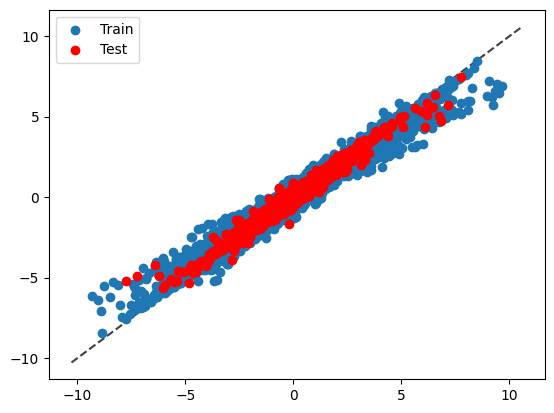

In [11]:
## Comparison of forces Training and Prediction
import matplotlib.pyplot as plt
import numpy as np

yref_train, yplip_train = np.genfromtxt('ResultsTrain6e-06_1.txt',usecols=(1,2),unpack=True)
yref_test, yplip_test = np.genfromtxt('ResultsTest6e-06_1.txt',usecols=(1,2),unpack=True)

plt.scatter(yref_train,yplip_train,label='Train')
plt.scatter(yref_test,yplip_test,c='r',label='Test')
lims = [
    np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    np.max([plt.xlim(), plt.ylim()]),  # max of both axes
]

plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
plt.legend()
"""
fig,(ax1,ax2)= plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True) 
ax1.scatter(yref_train,yplip_train)
ax2.scatter(yref_test,yplip_test)

ax1.set_xlabel('Reference')
ax1.set_ylabel('PLIP')

ax1.set_title("Training set")
ax2.set_title("Test set")


lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax1.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
ax2.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
"""

In [ ]:
## Generate Potential for LAMMPS

In [ ]:
!plip_fit --genpot

In [ ]:
## Clean the generated test files